In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
on_jasmin = True
url_tpls = {}
if on_jasmin:
    url_tpls['2d'] = 'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/5km-RAL3/2d/data.2d.v1.z{zoom}.zarr'
    url_tpls['3d'] = 'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/5km-RAL3/2d/data.3d.v1.z{zoom}.zarr'
else:
    url_tpls['2d'] = 'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/5km-RAL3/2d/data.2d.v1.z{zoom}.zarr'
    url_tpls['3d'] = 'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/5km-RAL3/2d/data.3d.v1.z{zoom}.zarr'
    

In [3]:
# 11 zoom levels available.
ds = xr.open_zarr(url_tpls['2d'].format(zoom=10))

In [4]:
ds

<xarray.Dataset> Size: 13TB
Dimensions:  (cell: 12582912, time: 10489)
Coordinates:
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/24)
    clivi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clt      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clwvi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hflsd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hfssd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    huss     (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ...       ...
    rsut     (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    rsutcs   (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    tas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ts       (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    uas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    vas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>

In [7]:
ds.tas.isel(time=1).values

array([299.86896, 299.8361 , 299.84088, ..., 300.6543 , 300.7017 ,
       300.67648], dtype=float32)

In [8]:
def plot_all_fields_2d(zoom, time_idx):
    ds_plot = xr.open_zarr(url_tpls['2d'].format(zoom=zoom))

    projection = ccrs.Robinson(central_longitude=0)
    
    fig, axes = plt.subplots(6, 4, figsize=(30, 20), subplot_kw={'projection': projection}, layout='constrained')
    plt.suptitle(f'UM N2560 RAL3 healpix zoom={zoom}')
    
    for ax, (name, da) in zip(axes.flatten(), ds_plot.data_vars.items()):
        timename = [c for c in da.coords if c.startswith('time')][0]
        time = pd.Timestamp(ds[timename].values[time_idx])
    
        data = da.isel(**{timename: time_idx})
        ax.set_title(f'{timename}: {time} - {name}')
        ax.set_global()
        im = egh.healpix_show(data.values, ax=ax);
        long_name = da.long_name
            
        plt.colorbar(im, label=f'{long_name} ({da.attrs.get("units", "-")})')
        ax.coastlines()

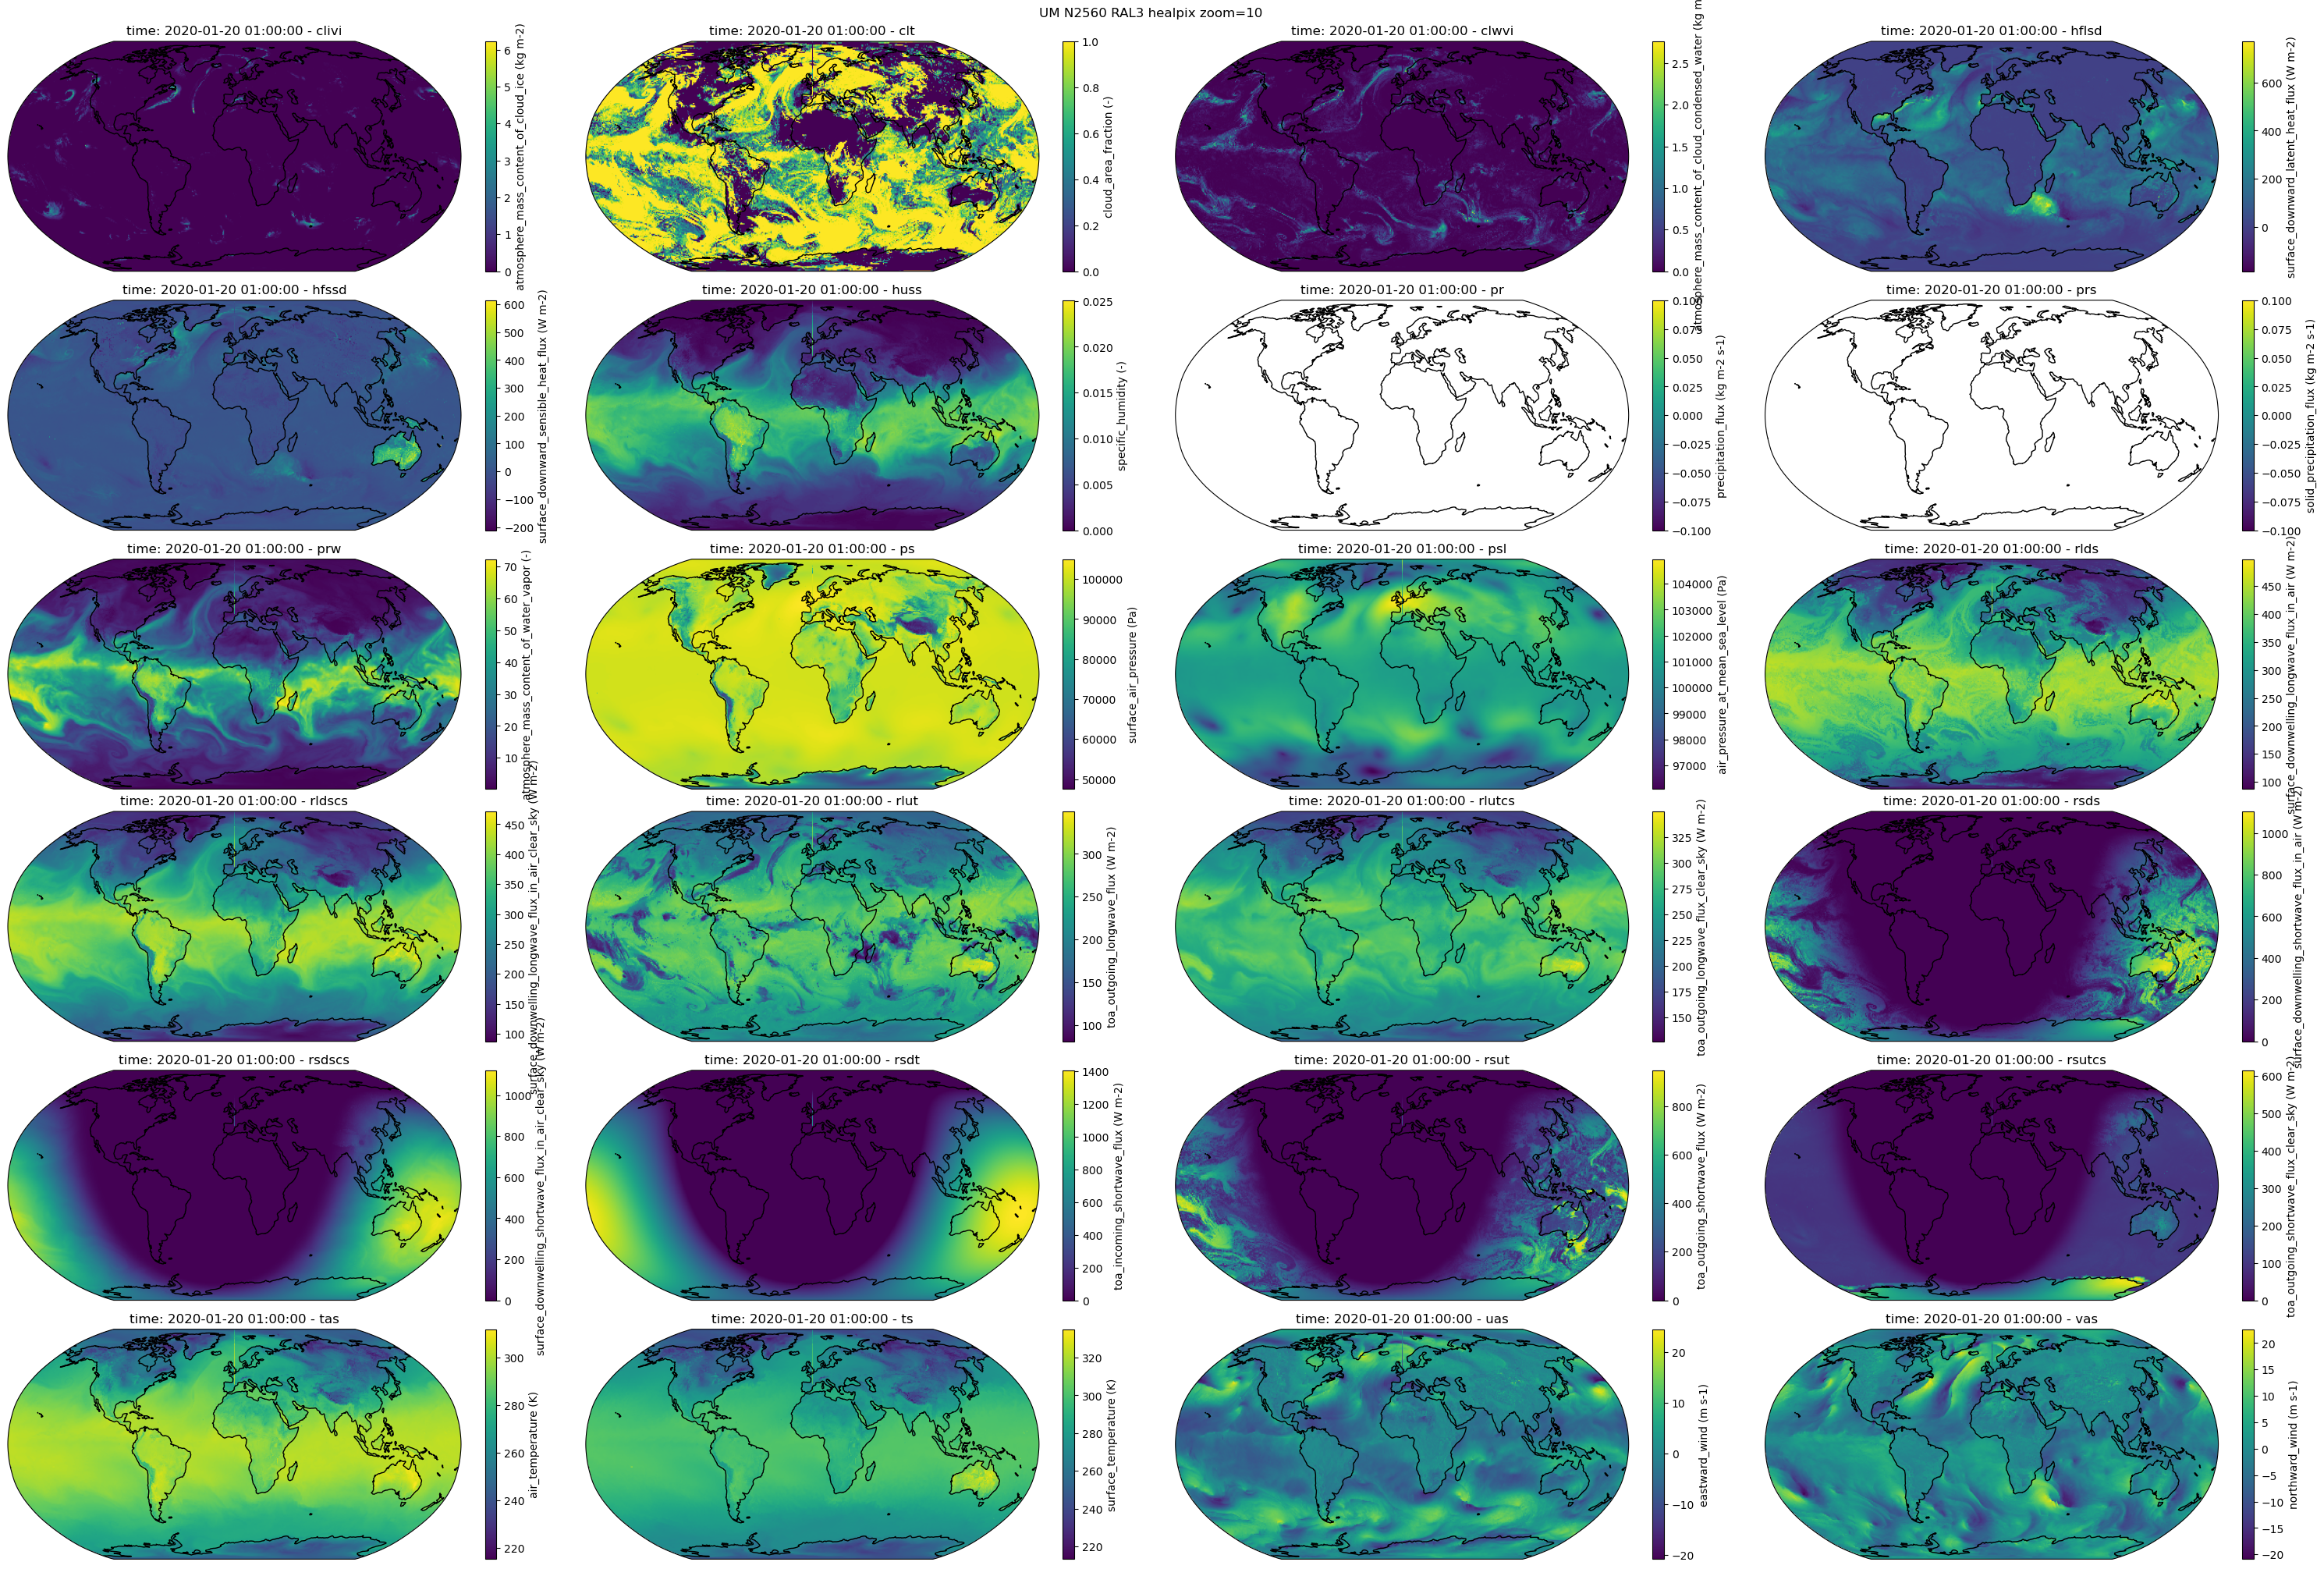

In [9]:
plot_all_fields_2d(10, 1)
